In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("cleaned_laptop_data.csv")
print("Loaded data shape:", df.shape)
df.head()

Loaded data shape: (3976, 617)


,Price,RAM,Ghz,SSD,HDD,Battery_Life,Brand_AVITA,Brand_Acer,Brand_Apple,Brand_Coconics,...,Adapter_76,Adapter_80,Adapter_83,Adapter_86,Adapter_87,Adapter_90,Adapter_95,Adapter_96,Adapter_97,Adapter_no
0,22990,4,2.0,64,0,9.15,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,36289,8,4.0,512,0,9.15,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,78500,16,3.3,512,0,9.15,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,55490,8,4.2,512,0,7.30,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,21990,8,1.7,512,0,9.15,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics")
print(f"MAE(Mean Absolute Error): {mae:.2f}")
print(f"RMSE(Root Mean Squred Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics
MAE(Mean Absolute Error): 12770.94
RMSE(Root Mean Squred Error): 19919.13
R² Score: 0.8513


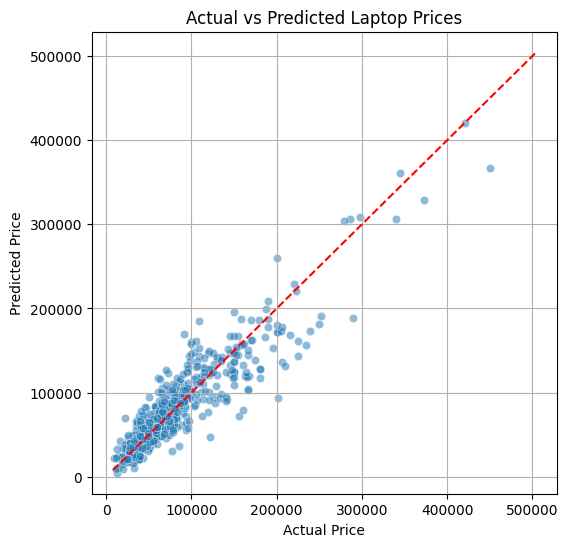

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()